In [6]:
import pandas as pd  # For handling and manipulating data in DataFrame format
import numpy as np  # For numerical operations and array manipulations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static visualizations like plots and charts
import seaborn as sns  # For enhanced statistical data visualization
import plotly.express as px  # For interactive visualizations


In [7]:
# Data preparation and splitting
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numeric labels
from sklearn.preprocessing import StandardScaler  # For standardizing features by scaling them to a standard normal distribution

In [10]:
# Classification algorithms
from sklearn.tree import DecisionTreeClassifier  # For decision tree-based classification
from sklearn.neighbors import KNeighborsClassifier  # For k-nearest neighbors classification
from sklearn.ensemble import RandomForestClassifier  # For random forest ensemble-based classification



In [11]:
# Model evaluation metrics
from sklearn.metrics import classification_report  # For generating precision, recall, and F1 score
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix to evaluate classification
from sklearn.metrics import accuracy_score  # For computing the accuracy of the model
from sklearn.metrics import RocCurveDisplay  # For plotting the ROC curve of binary classification models

In [13]:
df=pd.read_csv("Banking_Customers_Dataset.csv")

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.drop(columns=['RowNumber'],inplace=True) # drop not useful column

In [16]:
df.columns # names of columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [18]:
df.describe().T # describe numric columns 

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [19]:
df.describe(include='O').T # describe category columns 

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [20]:
df.isna().sum() # Not null value

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
#Analyis and Visualisation

In [22]:
df.groupby(['Surname','Geography',])['Balance'].max().nlargest(5)

Surname   Geography
Lo        Spain        250898.09
To Rot    France       238387.56
Haddon    Spain        222267.63
McIntosh  Spain        221532.80
Shaw      Spain        216109.88
Name: Balance, dtype: float64

In [23]:
df.groupby('NumOfProducts')['Balance'].max().nlargest(5) # num of product don't affect in balance

NumOfProducts
3    250898.09
1    238387.56
2    214346.96
4    195238.29
Name: Balance, dtype: float64

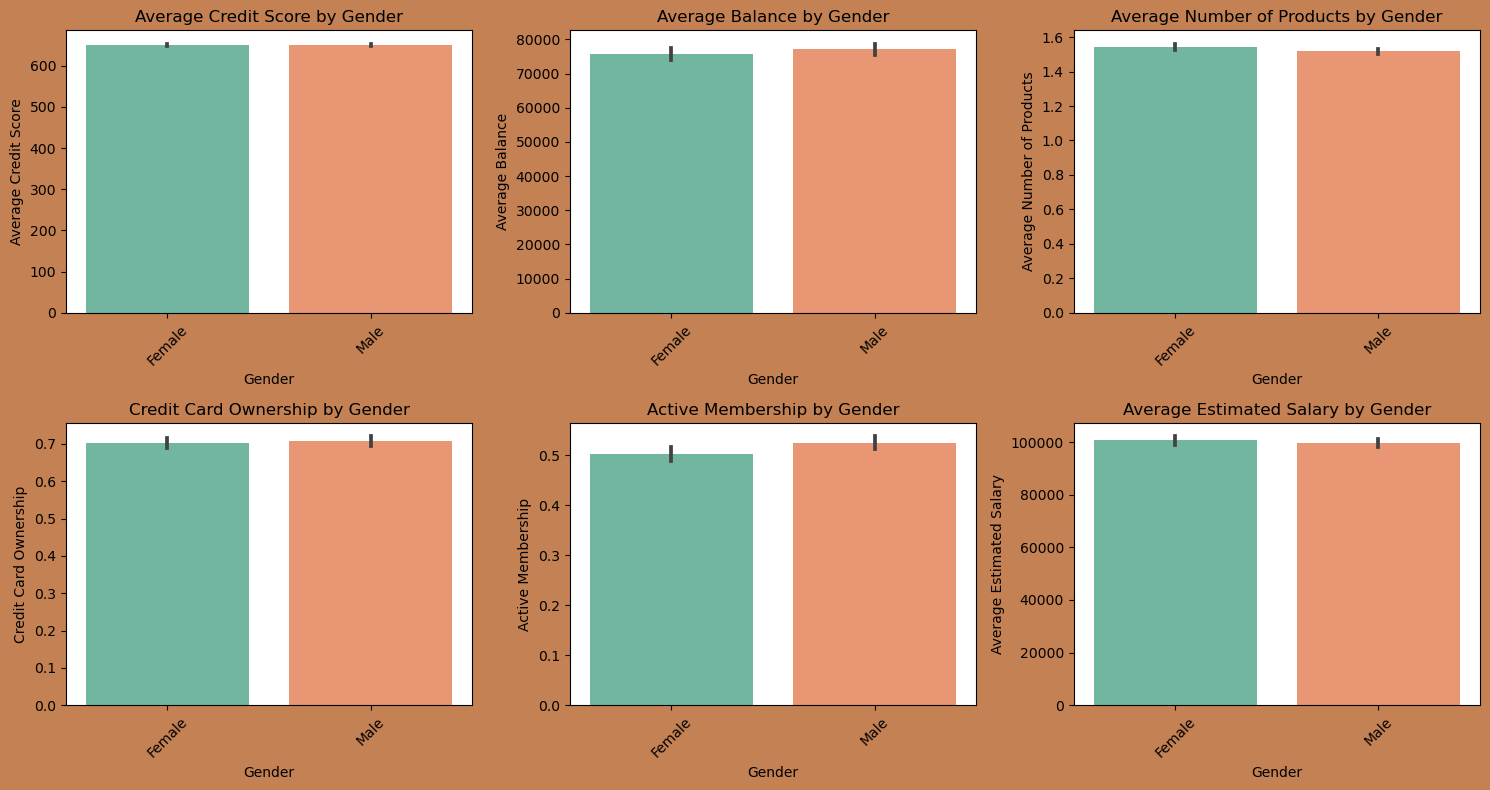

In [25]:
plt.figure(figsize=(15, 8), facecolor="#C38154")

features = ['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
titles = ['Average Credit Score by Gender', 'Average Balance by Gender', 
          'Average Number of Products by Gender', 'Credit Card Ownership by Gender', 
          'Active Membership by Gender', 'Average Estimated Salary by Gender']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Gender', y=feature, data=df, palette='Set2')
    plt.title(titles[i-1])
    plt.xlabel('Gender')
    plt.ylabel(titles[i-1].split(' by ')[0])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
df.groupby('Geography')['NumOfProducts'].sum() # sum of product for each country 
# that is reason for heigh balance

Geography
France     7676
Germany    3813
Spain      3813
Name: NumOfProducts, dtype: int64

In [27]:
df.groupby('Geography')['Balance'].sum() # sum of balance for each country

Geography
France     3.113325e+08
Germany    3.004029e+08
Spain      1.531236e+08
Name: Balance, dtype: float64

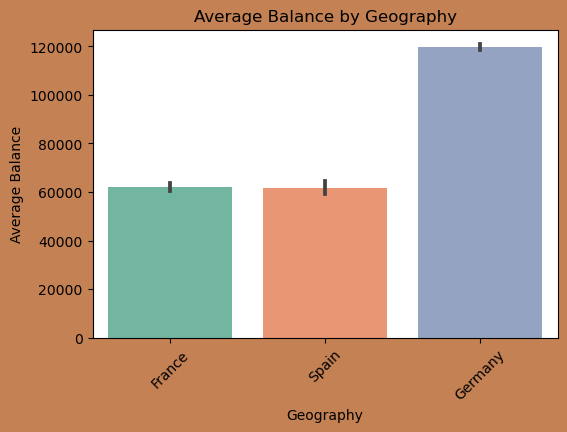

In [28]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.barplot(x='Geography', y='Balance', data=df, palette='Set2')
plt.title('Average Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

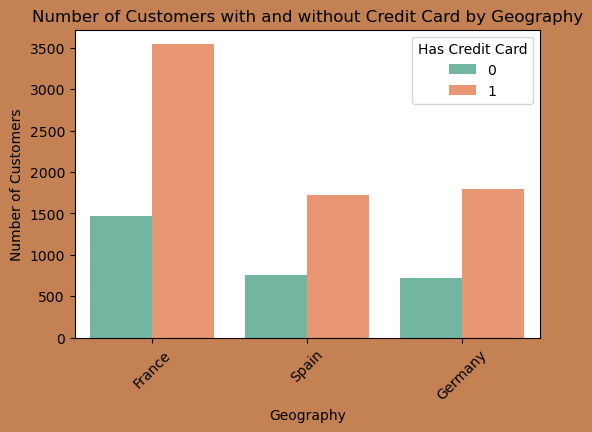

In [29]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.countplot(x='Geography', hue='HasCrCard', data=df, palette='Set2')
plt.title('Number of Customers with and without Credit Card by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Has Credit Card')
plt.xticks(rotation=45)
plt.show()

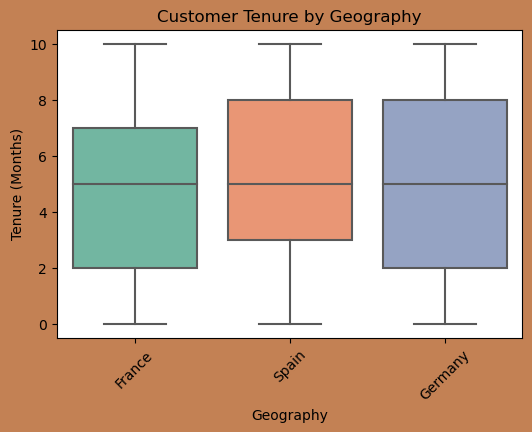

In [30]:
plt.figure(figsize=(6, 4), facecolor="#C38154")
sns.boxplot(x='Geography', y='Tenure', data=df, palette='Set2')
plt.title('Customer Tenure by Geography')
plt.xlabel('Geography')
plt.ylabel('Tenure (Months)')
plt.xticks(rotation=45)
plt.show()

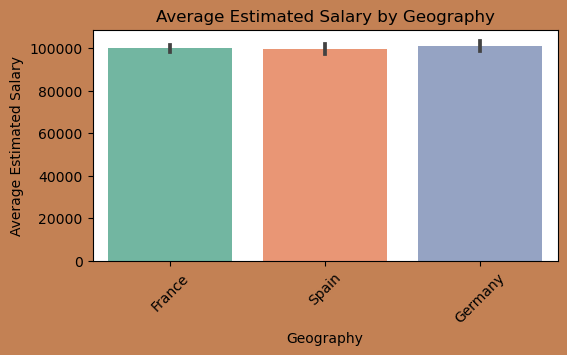

In [31]:
plt.figure(figsize=(6, 3), facecolor="#C38154")
sns.barplot(x='Geography', y='EstimatedSalary', data=df, palette='Set2')
plt.title('Average Estimated Salary by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Estimated Salary')
plt.xticks(rotation=45)
plt.show()

In [32]:
def categorize_age(age):
    if 18 <= age <= 30:
        return '18-30'
    elif 31 <= age <= 45:
        return '31-45'
    elif 46 <= age <= 60:
        return '46-60'
    elif 61 <= age <= 92:
        return '61-92'
    else:
        return 'Unknown'
df['AgeGroup'] = df['Age'].apply(categorize_age)

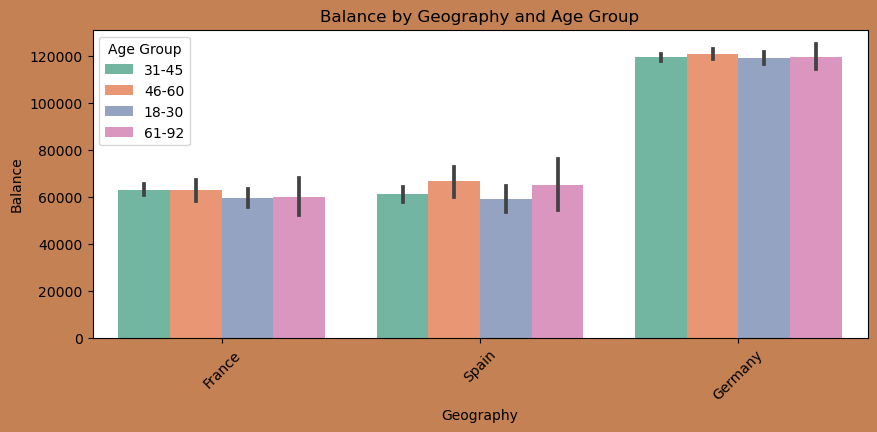

In [33]:
plt.figure(figsize=(10, 4), facecolor="#C38154")
sns.barplot(x='Geography', y='Balance', hue='AgeGroup', data=df, palette='Set2')
plt.title('Balance by Geography and Age Group')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

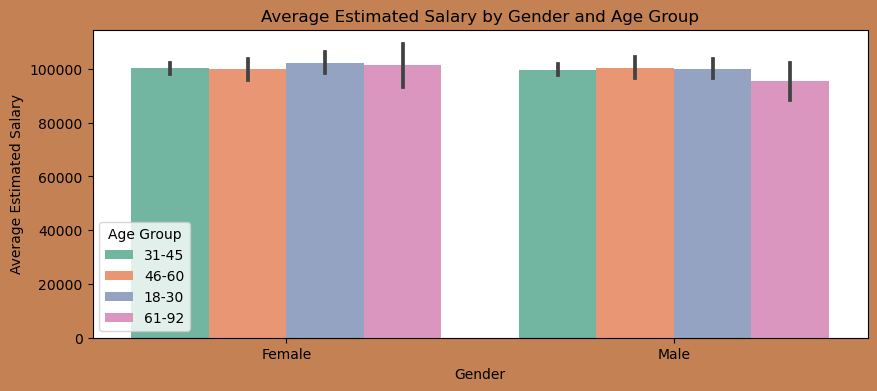

In [34]:
plt.figure(figsize=(10, 4), facecolor="#C38154")
sns.barplot(x='Gender', y='EstimatedSalary', hue='AgeGroup', data=df, palette='Set2')
plt.title('Average Estimated Salary by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Average Estimated Salary')
plt.legend(title='Age Group')
plt.show()

In [35]:
target = 'Exited'


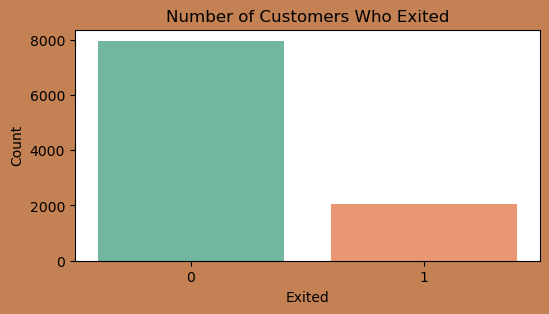

In [36]:
plt.figure(figsize=(6, 3), facecolor="#C38154")
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Number of Customers Who Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

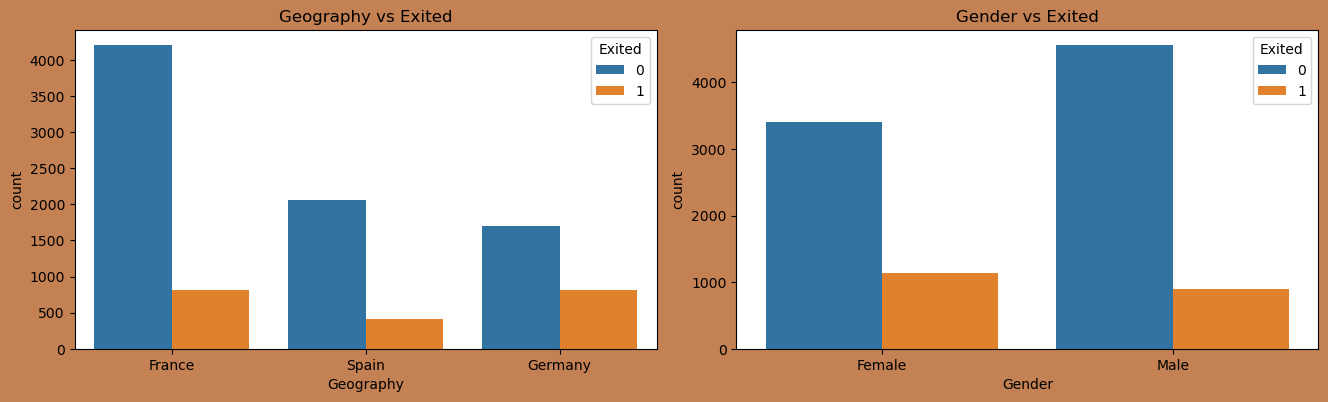

In [37]:
categorical_columns =['Geography','Gender']
plt.figure(figsize=(20, 15),facecolor="#C38154")
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

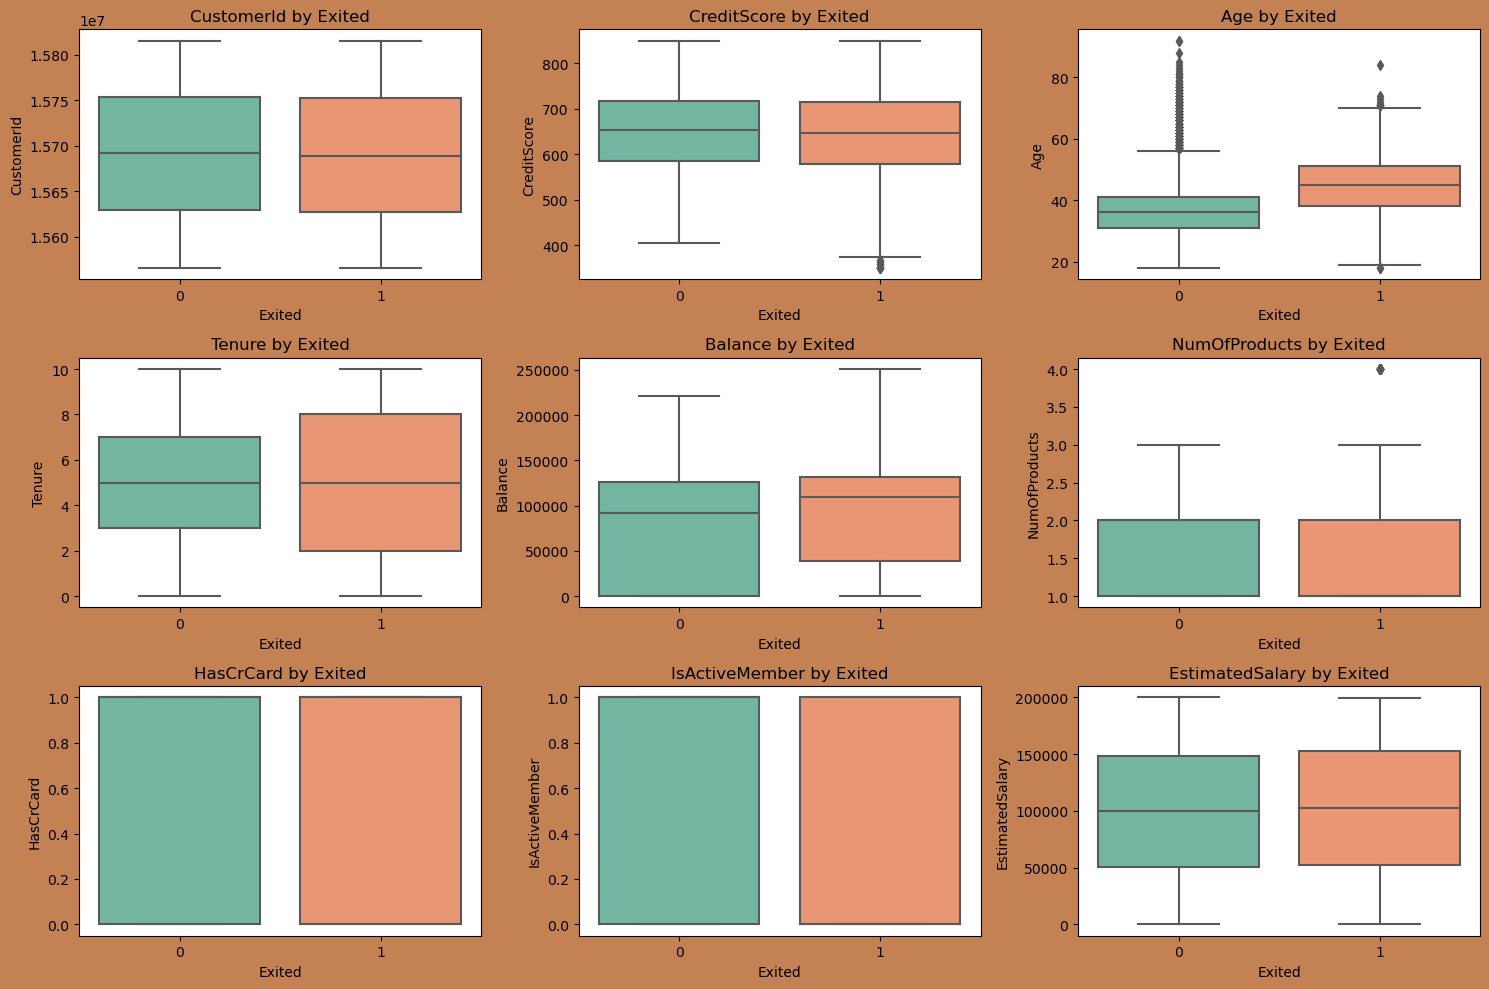

In [38]:
plt.figure(figsize=(15, 10),facecolor="#C38154")

numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns='Exited').columns

num_columns = len(numerical_columns)
n_rows = (num_columns + 2) // 3  

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x='Exited', y=column, data=df, palette='Set2')
    plt.title(f'{column} by Exited')
    plt.xlabel('Exited')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

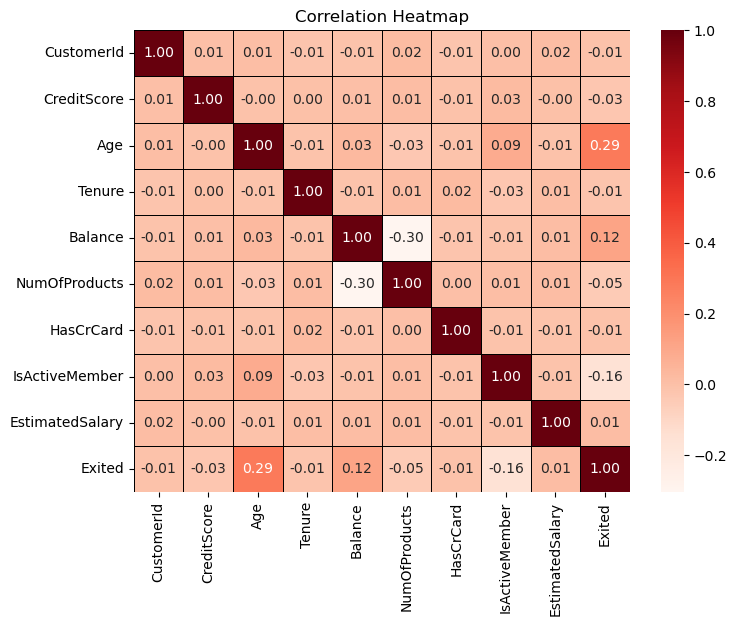

In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,cmap='Reds', linecolor='black',fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
#Predictive Modelling


In [41]:
le = LabelEncoder()
columns_to_encode = ['Geography', 'Gender']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [42]:
from sklearn.model_selection import train_test_split
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
#Decsion Tree

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(x_train)
y_test_pred_dt = dt_model.predict(x_test)

# Calculate accuracy
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
# Print accuracy
print("Decision Tree - Training Accuracy:", accuracy_train_dt)
print("Decision Tree - Testing Accuracy:", accuracy_test_dt)

# Print the classification report
print("Decision Tree - Training Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print("Decision Tree - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_dt))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.782
Decision Tree - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Decision Tree - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



In [45]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)

# Calculate accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
# Print accuracy
print("Random Forest - Training Accuracy:", accuracy_train_rf)

# Print the classification report
print("Random Forest - Training Classification Report:")
print(classification_report(y_train, y_train_pred_rf))
print("Random Forest - Testing Accuracy:", accuracy_test_rf)
print("Random Forest - Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Training Accuracy: 1.0
Random Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Random Forest - Testing Accuracy: 0.8645
Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

